In [24]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [25]:
url = 'https://en.wikipedia.org/wiki/List_of_cities_by_average_temperature'
headers = {'user-Agent':"Mozilla/5.0"}
response = requests.get(url, headers=headers)
print(response)

<Response [200]>


In [26]:
soup = BeautifulSoup(response.text, 'html.parser')

In [27]:
#Convert the table to dataframe
table = soup.find("table",{"class":'wikitable'})
df = pd.read_html(str(table))[0]
df.head()

<ipython-input-27-95a8fbea6970>:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,Ref.
0,Algeria,Algiers,11.2 (52.2),11.5 (52.7),13.6 (56.5),15.6 (60.1),18.8 (65.8),22.6 (72.7),25.7 (78.3),26.6 (79.9),23.9 (75.0),20.4 (68.7),15.7 (60.3),12.6 (54.7),18.2 (64.8),[1]
1,Algeria,Tamanrasset,12.8 (55.0),15.0 (59.0),18.1 (64.6),22.2 (72.0),26.1 (79.0),28.9 (84.0),28.7 (83.7),28.2 (82.8),26.5 (79.7),22.4 (72.3),17.3 (63.1),13.9 (57.0),21.7 (71.1),[2]
2,Algeria,Reggane,16.0 (60.8),18.2 (64.8),23.1 (73.6),27.9 (82.2),32.2 (90.0),36.4 (97.5),39.8 (103.6),38.4 (101.1),35.5 (95.9),29.2 (84.6),22.0 (71.6),17.8 (64.0),28.3 (82.9),[3]
3,Angola,Luanda,26.7 (80.1),28.5 (83.3),28.6 (83.5),28.2 (82.8),27.0 (80.6),23.9 (75.0),22.1 (71.8),22.1 (71.8),23.5 (74.3),25.2 (77.4),26.7 (80.1),26.9 (80.4),25.8 (78.4),[4]
4,Benin,Cotonou,27.3 (81.1),28.5 (83.3),28.9 (84.0),28.6 (83.5),27.8 (82.0),26.5 (79.7),25.8 (78.4),25.6 (78.1),26.0 (78.8),26.7 (80.1),27.6 (81.7),27.3 (81.1),27.2 (81.0),[5]


In [32]:
#cleaning the data
new_df = df[['Country','City','Year']]
new_df.head()

,Country,City,Year
0,Algeria,Algiers,18.2 (64.8)
1,Algeria,Tamanrasset,21.7 (71.1)
2,Algeria,Reggane,28.3 (82.9)
3,Angola,Luanda,25.8 (78.4)
4,Benin,Cotonou,27.2 (81.0)


In [33]:
#remove the farenheit values from the table
new_df['Year'] = new_df['Year'].str.extract(r'^([\d.]+)')
new_df.head()

<ipython-input-33-708d4d0a757c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Year'] = new_df['Year'].str.extract(r'^([\d.]+)')


,Country,City,Year
0,Algeria,Algiers,18.2
1,Algeria,Tamanrasset,21.7
2,Algeria,Reggane,28.3
3,Angola,Luanda,25.8
4,Benin,Cotonou,27.2


In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  111 non-null    object
 1   City     111 non-null    object
 2   Year     111 non-null    object
dtypes: object(3)
memory usage: 2.7+ KB


In [34]:
#Convert the year value from string to float
#errors = coerce , when we face any issue while converting the value to string make it as nan
new_df['Year'] = pd.to_numeric(new_df['Year'] , errors = 'coerce')
new_df.head()
# new_df.info()

<ipython-input-34-f784c04510cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Year'] = pd.to_numeric(new_df['Year'] , errors = 'coerce')


,Country,City,Year
0,Algeria,Algiers,18.2
1,Algeria,Tamanrasset,21.7
2,Algeria,Reggane,28.3
3,Angola,Luanda,25.8
4,Benin,Cotonou,27.2


In [35]:
#drop na values
new_df.dropna()

# #fill default values
# new_df.fillna('0')

,Country,City,Year
0,Algeria,Algiers,18.2
1,Algeria,Tamanrasset,21.7
2,Algeria,Reggane,28.3
3,Angola,Luanda,25.8
4,Benin,Cotonou,27.2
...,...,...,...
106,Zambia,Ndola,20.3
107,Zambia,Lusaka,19.9
108,Zambia,Livingstone,21.8
109,Zimbabwe,Harare,18.4


In [36]:
new_df.head()

,Country,City,Year
0,Algeria,Algiers,18.2
1,Algeria,Tamanrasset,21.7
2,Algeria,Reggane,28.3
3,Angola,Luanda,25.8
4,Benin,Cotonou,27.2


In [39]:
#Visualize the distribution of temperature
import seaborn as sns
import matplotlib.pyplot as plt


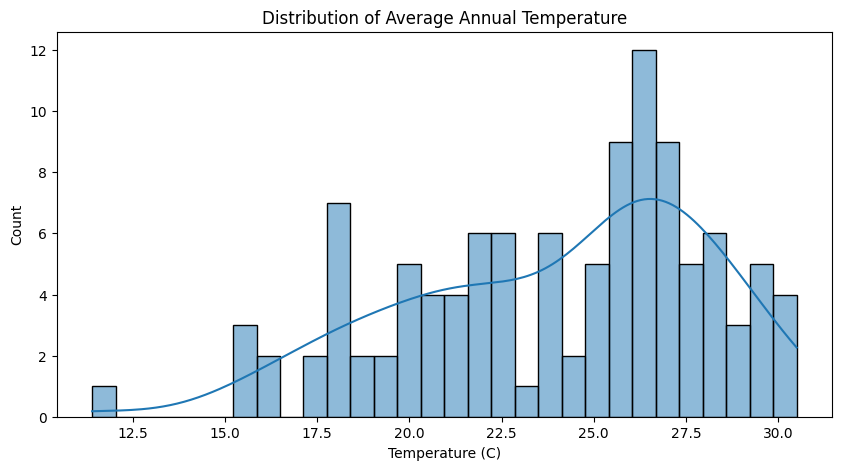

In [47]:
plt.figure(figsize = (10,5))
sns.histplot(new_df['Year'],bins=30,kde=True)
plt.title('Distribution of Average Annual Temperature')
plt.xlabel('Temperature (C)')
plt.show()

In [48]:
#Print Top 10 Hottest cities
top_10 = new_df.sort_values(by='Year',ascending=False).head(10)
top_10

,Country,City,Year
30,Eritrea,Assab,30.5
82,Somalia,Bosaso,30.0
24,Djibouti,Djibouti,29.9
95,Sudan,Khartoum,29.9
61,Mali,Ségou,29.6
21,Chad,Abéché,29.4
48,Kenya,Garissa,29.3
71,Niger,Niamey,29.3
49,Kenya,Lodwar,29.3
62,Mali,Timbuktu,28.9


Top 10 hottest cities
Top 10 coldest cities
Find there is difference in temp between hottest and coldest

h0 - There is no difference
h1 - There is a difference


In [51]:
from scipy import stats

hottest = new_df.sort_values(by='Year',ascending=False).head(10)['Year']
coldest = new_df.sort_values(by='Year').head(10)['Year']
coldest

,Year
66,11.4
87,15.5
29,15.6
88,15.6
86,16.2
32,16.4
67,17.2
60,17.7
47,17.8
54,17.9


In [52]:
t_stat , p_val = stats.ttest_ind(hottest , coldest)

print(t_stat)
print(p_val)

21.650137664159132
2.4406149416212612e-14


In [53]:
if p_val < 0.05:
  print('Reject the Null Hypothesis')
  print('There is significant temperature difference')
else:
  print('Fail to reject the Null Hypothesis')
  print('There is no significant temperature difference')

Reject the Null Hypothesis
There is significant temperature difference
